In [ ]:
pip install pandas openpyxl seaborn scikit-learn matplotlib


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1**: Inspect and Clean Data

In [ ]:
file_path = '/content/sample_data/NCRN LAND Bird Monitoring Data 2007 - 2017_Public.xlsx'
df = pd.read_excel(file_path)
print(df.head())

  Admin_Unit_Code  Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
1            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
2            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
3            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   
4            ANTI            NaN    ANTI 2  ANTI-0207        Forest  2008   

        Date Start_Time  End_Time         Observer  ...  NPSTaxonCode  \
0 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         85824   
1 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         88038   
2 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         85824   
3 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         95300   
4 2008-05-28   06:42:00  06:52:00  Desiree Narango  ...         87106   

  AOU_Code PIF_Watchlist_Status Regional_Stewardship_Status  Temperature  \
0     ACFL            

In [ ]:
print(df.describe())

       Sub_Unit_Code          Year                           Date  \
count            0.0  14230.000000                          14230   
mean             NaN   2015.403373  2015-11-12 10:17:29.388615424   
min              NaN   2007.000000            2007-05-11 00:00:00   
25%              NaN   2015.000000            2015-06-22 00:00:00   
50%              NaN   2016.000000            2016-05-24 00:00:00   
75%              NaN   2017.000000            2017-05-28 00:00:00   
max              NaN   2017.000000            2017-07-17 00:00:00   
std              NaN      1.995262                            NaN   

              Visit    AcceptedTSN   NPSTaxonCode   Temperature      Humidity  
count  14230.000000   14105.000000   14230.000000  14230.000000  14230.000000  
mean       1.868728  201008.876569  108631.739002     22.159691     78.458883  
min        1.000000  174773.000000       0.000000      0.000000      0.000000  
25%        1.000000  178581.000000   84865.000000     18.7

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14230 entries, 0 to 14229
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              14230 non-null  object        
 1   Sub_Unit_Code                0 non-null      float64       
 2   Site_Name                    2801 non-null   object        
 3   Plot_Name                    14230 non-null  object        
 4   Location_Type                14230 non-null  object        
 5   Year                         14230 non-null  int64         
 6   Date                         14230 non-null  datetime64[ns]
 7   Start_Time                   14230 non-null  object        
 8   End_Time                     14230 non-null  object        
 9   Observer                     14230 non-null  object        
 10  Visit                        14230 non-null  int64         
 11  Interval_Length              14230 non-nu

In [ ]:
print(df.isnull().sum())

Admin_Unit_Code                    0
Sub_Unit_Code                  14230
Site_Name                      11429
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                        116
Distance                        1891
Flyover_Observed                   0
Sex                              220
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                      125
NPSTaxonCode                       0
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
D

**Step 2**: Data Cleaning and Feature Engineering

In [ ]:
# Dropping columns with a high percentage of missing values or those that are not needed
df = df.drop(columns=['Sub_Unit_Code', 'Site_Name', 'ID_Method', 'Distance', 'Sex', 'AcceptedTSN'])

In [ ]:
# Dropping rows with any remaining missing values
df = df.dropna()

In [ ]:
# Aggregate bird counts by Year and Plot_Name
df['bird_population'] = df.groupby(['Year', 'Plot_Name'])['AOU_Code'].transform('count')

In [ ]:
# Drop duplicates to avoid double-counting
df = df.drop_duplicates(subset=['Year', 'Plot_Name'])

**Step 3**: Exploratory Data Analysis

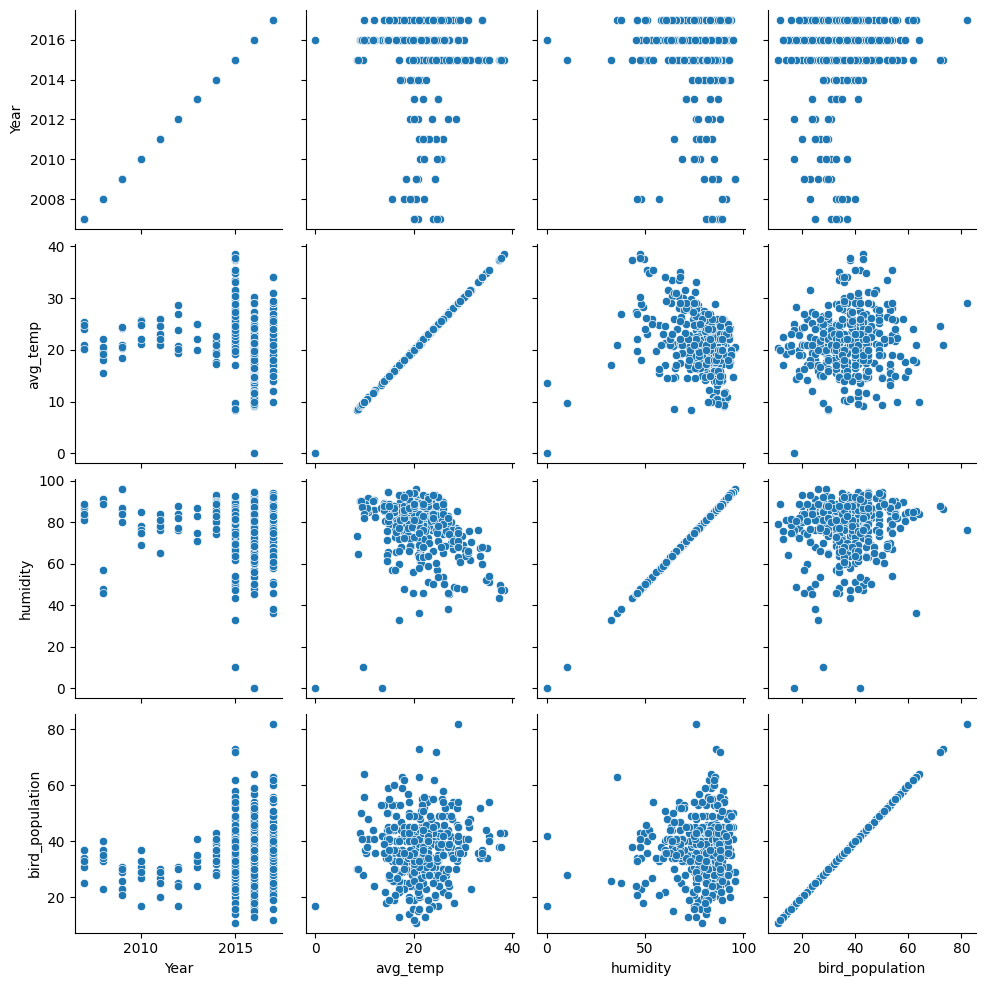

In [ ]:
data = data.loc[:, data.nunique() > 1]
sns.pairplot(data, diag_kind=None)
plt.show()

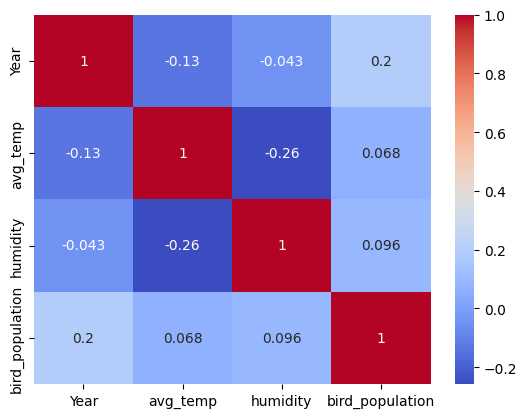

In [ ]:
# Correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

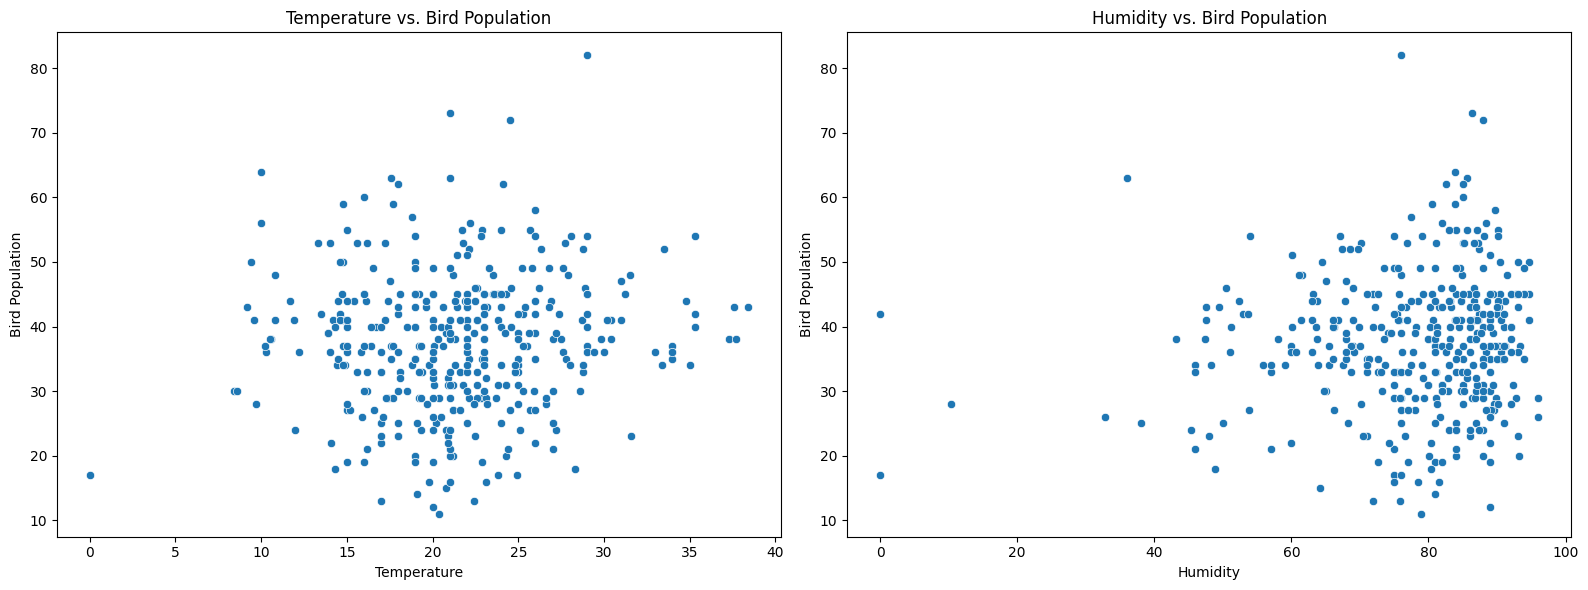

In [ ]:
numerical_features = ['Temperature', 'Humidity']
plt.figure(figsize=(16, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i+1)
    sns.scatterplot(x=feature, y='bird_population', data=df)
    plt.title(f'{feature} vs. Bird Population')
    plt.xlabel(feature)
    plt.ylabel('Bird Population')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

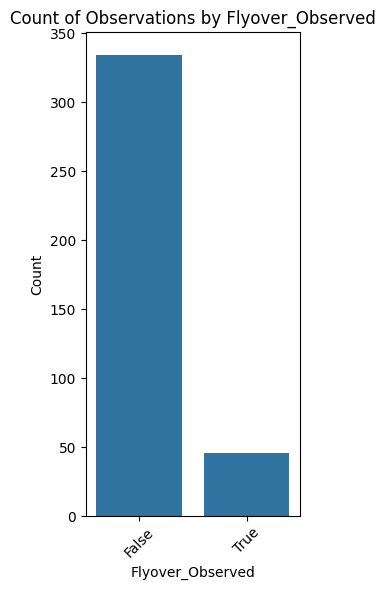

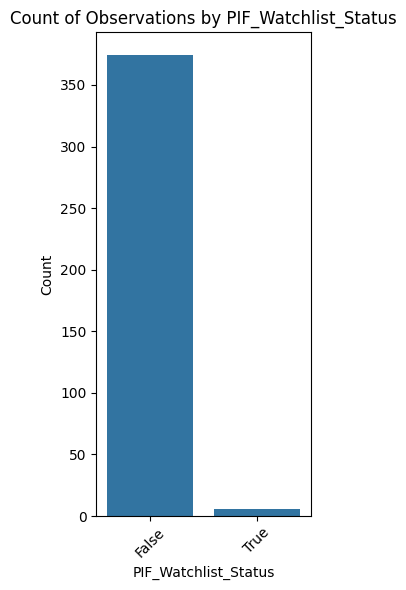

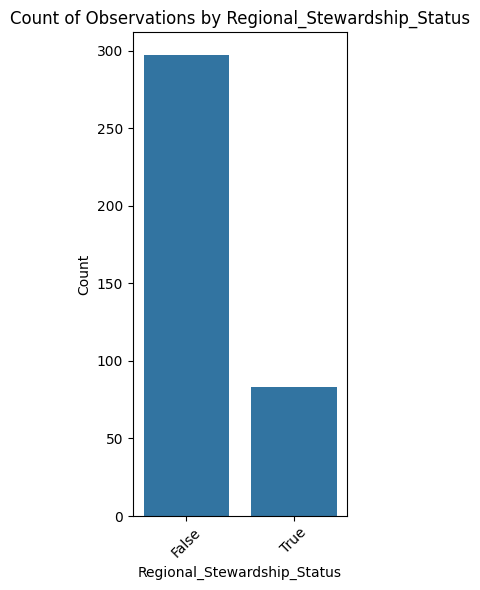

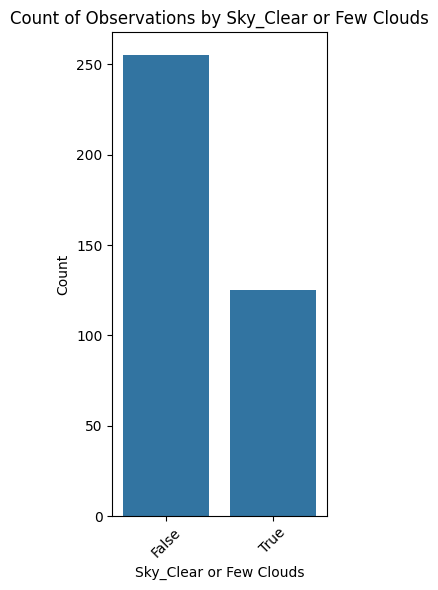

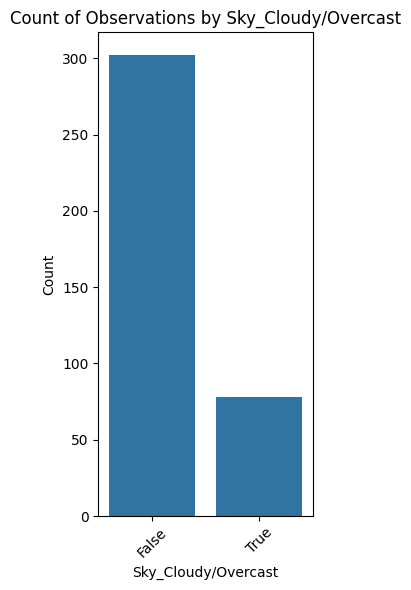

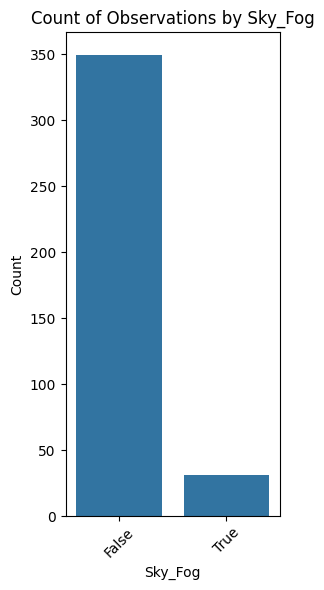

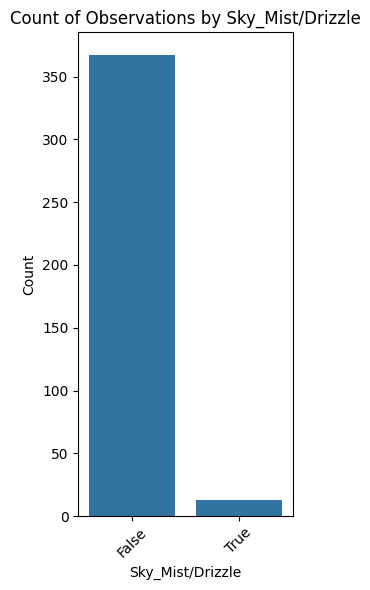

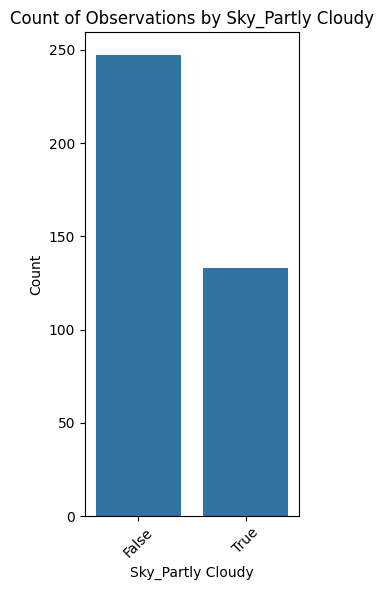

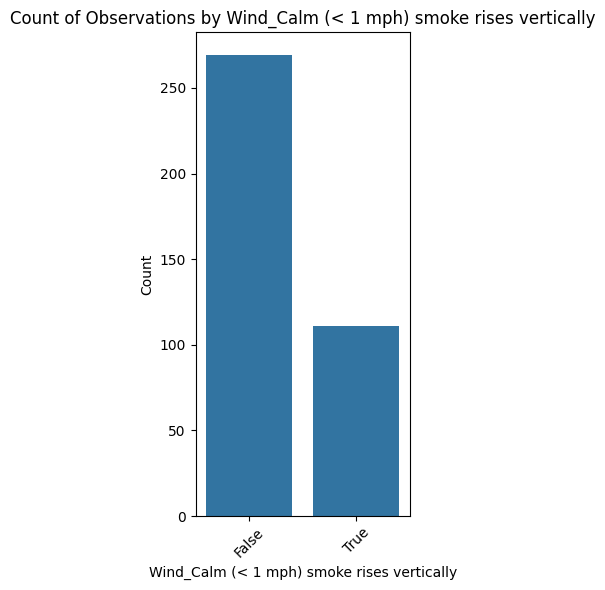

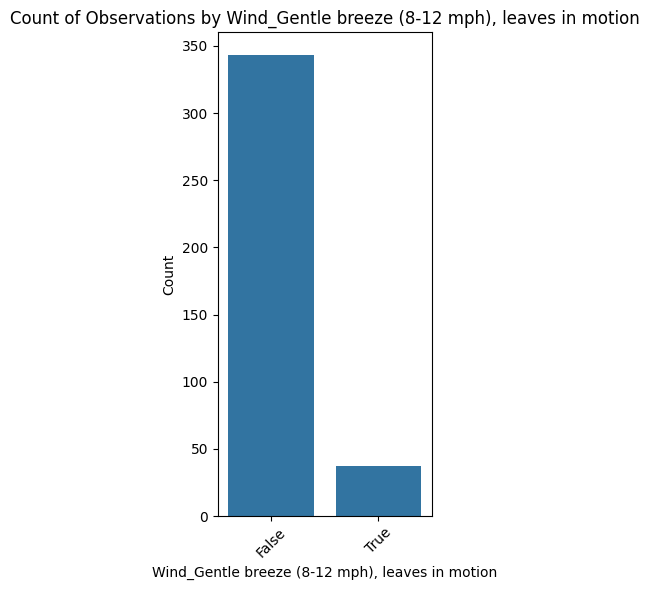

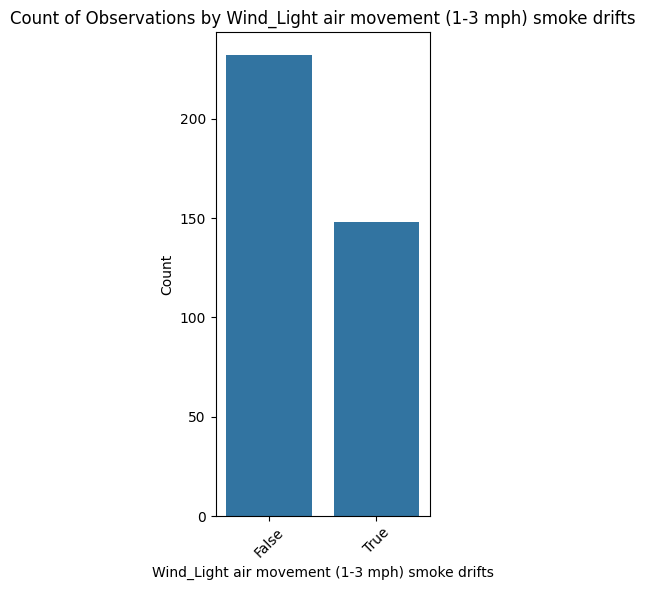

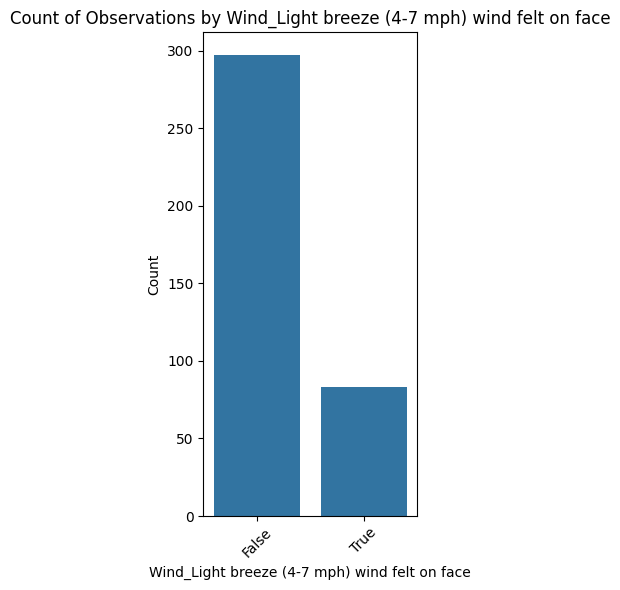

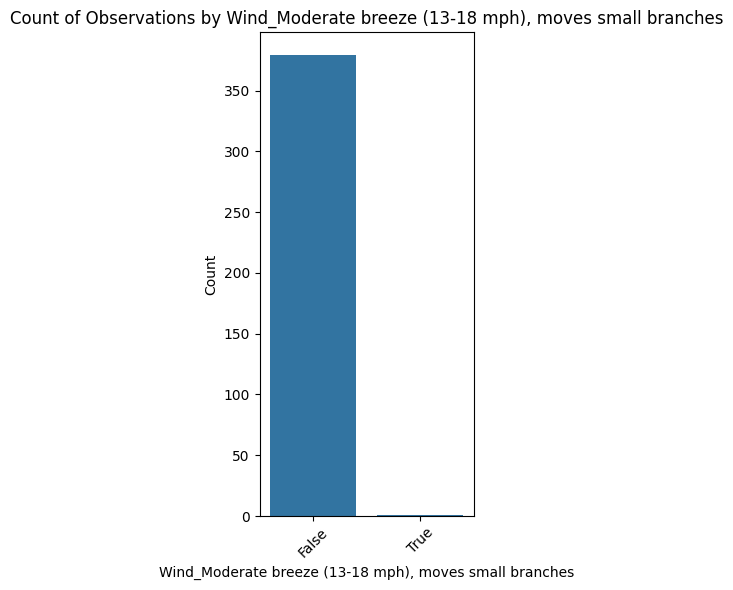

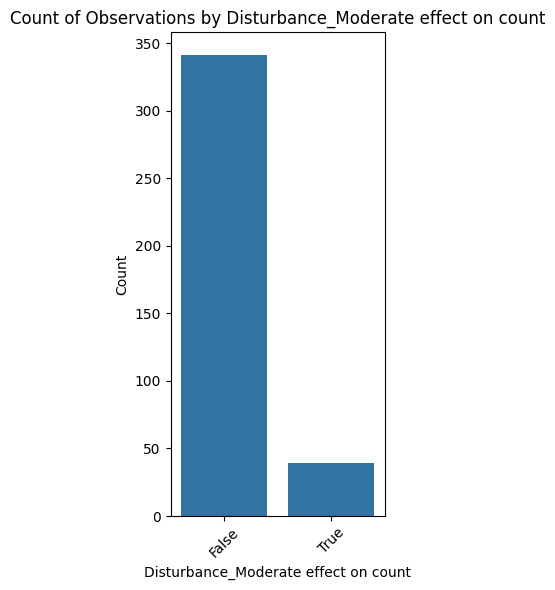

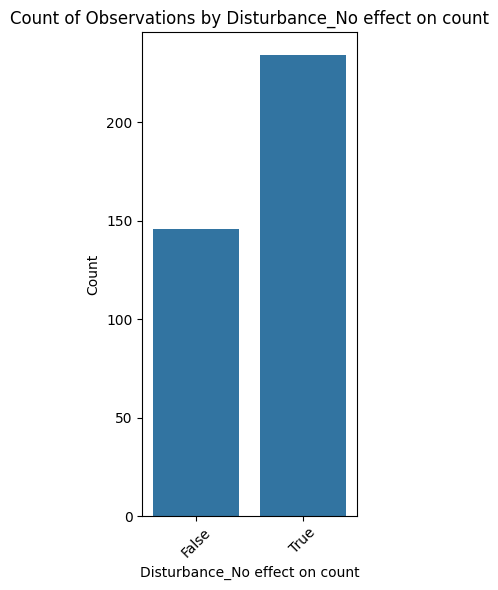

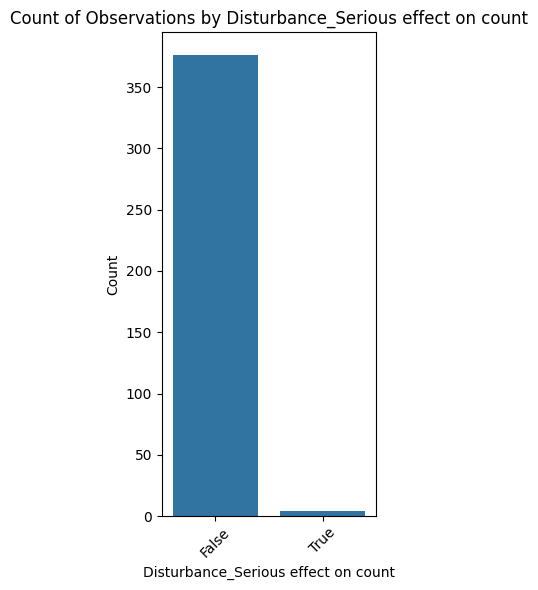

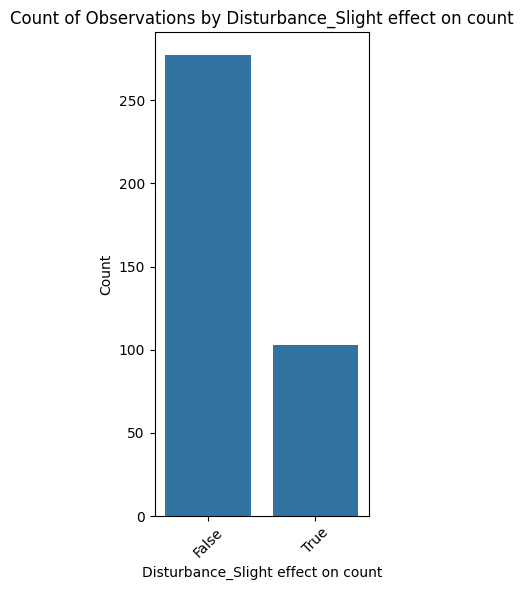

In [ ]:
categorical_features = ['Flyover_Observed', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
                        'Sky_Clear or Few Clouds', 'Sky_Cloudy/Overcast', 'Sky_Fog', 'Sky_Mist/Drizzle',
                        'Sky_Partly Cloudy', 'Wind_Calm (< 1 mph) smoke rises vertically',
                        'Wind_Gentle breeze (8-12 mph), leaves in motion',
                        'Wind_Light air movement (1-3 mph) smoke drifts',
                        'Wind_Light breeze (4-7 mph) wind felt on face',
                        'Wind_Moderate breeze (13-18 mph), moves small branches',
                        'Disturbance_Moderate effect on count', 'Disturbance_No effect on count',
                        'Disturbance_Serious effect on count', 'Disturbance_Slight effect on count']
plt.figure(figsize=(10, 6))

for feature in categorical_features:
    plt.figure(figsize=(3, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of Observations by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

RMSE: 10.381722787935438
R-squared: -0.0006336967503137725


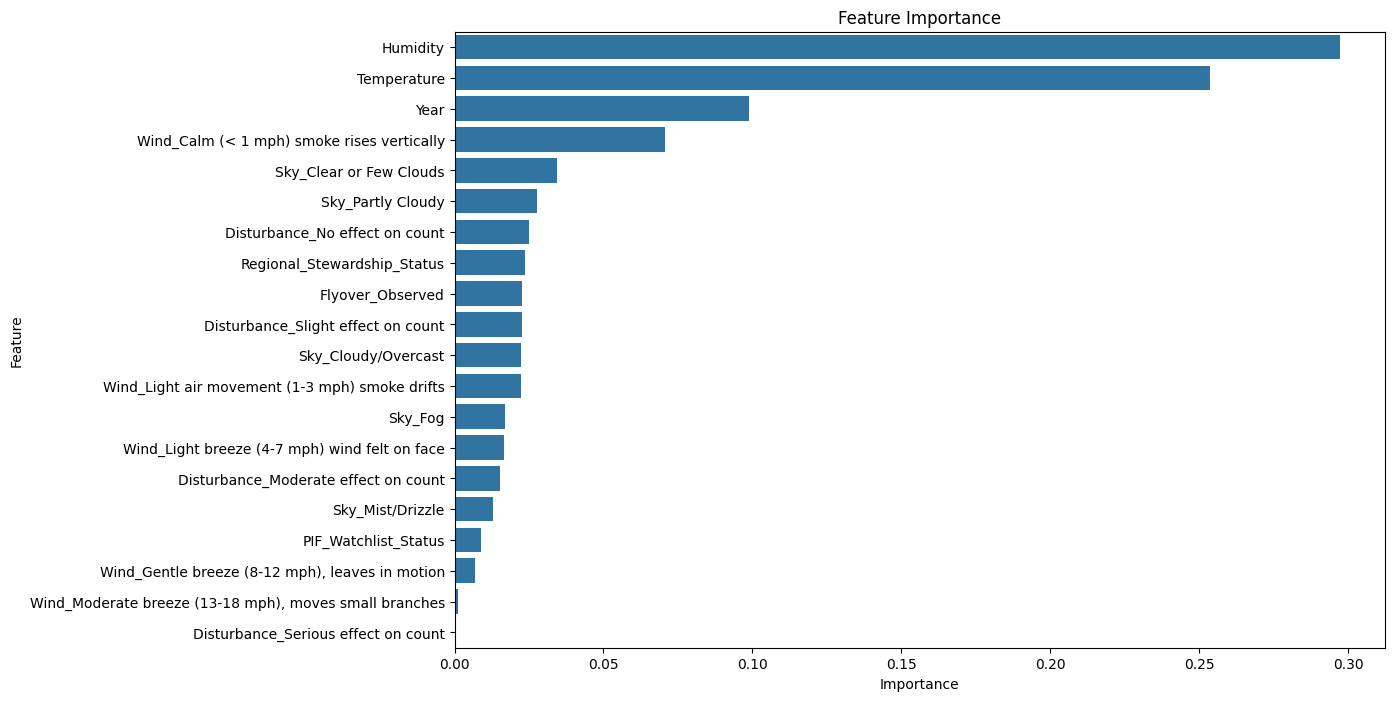

In [ ]:
selected_features = [
    'Year', 'Temperature', 'Humidity', 'Flyover_Observed',
    'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
    'Sky_Clear or Few Clouds', 'Sky_Cloudy/Overcast', 'Sky_Fog',
    'Sky_Mist/Drizzle', 'Sky_Partly Cloudy',
    'Wind_Calm (< 1 mph) smoke rises vertically',
    'Wind_Gentle breeze (8-12 mph), leaves in motion',
    'Wind_Light air movement (1-3 mph) smoke drifts',
    'Wind_Light breeze (4-7 mph) wind felt on face',
    'Wind_Moderate breeze (13-18 mph), moves small branches',
    'Disturbance_Moderate effect on count',
    'Disturbance_No effect on count', 'Disturbance_Serious effect on count',
    'Disturbance_Slight effect on count'
]

X = df[selected_features]
y = df['bird_population']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

# Extract feature importances from the model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()